# Evaluation examples

In [64]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%autoreload 2
# Node names from 0 to 19
node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18','19']
simulation = Simulator(n_nodes = 20, n_edges = 30, n_clusters = 5, seed = 12343, sample_size = 1000, node_names=node_names)
cluster_dag = simulation.run()

2023-08-22 18:24:38,497 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [66]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['0', '7'], 'C2': ['2', '18', '12', '19', '6'], 'C3': ['11', '1', '3', '9', '13', '8', '10'], 'C4': ['14', '17', '4'], 'C5': ['16', '5', '15']}
[('C1', 'C2'), ('C1', 'C3'), ('C3', 'C5'), ('C2', 'C3'), ('C2', 'C5'), ('C3', 'C4'), ('C2', 'C4'), ('C4', 'C5'), ('C1', 'C4'), ('C1', 'C5')]


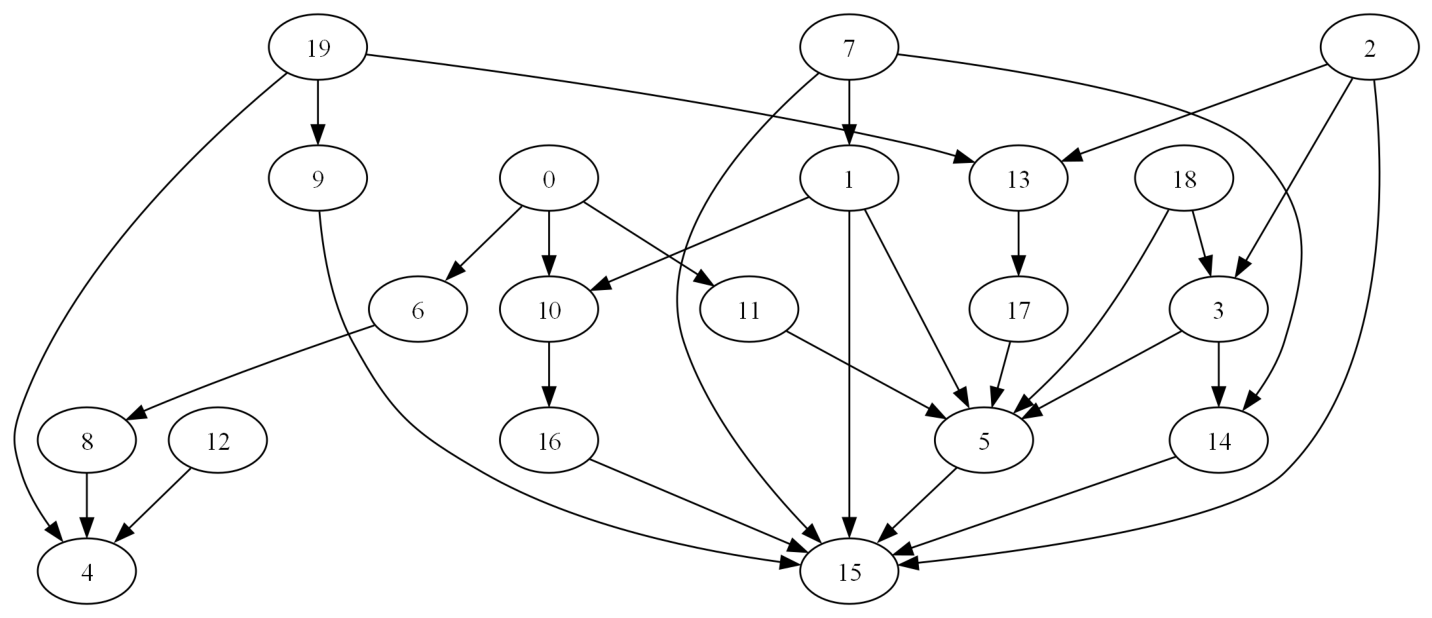

In [67]:
cluster_dag.true_dag.draw_pydot_graph()

In [68]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [69]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

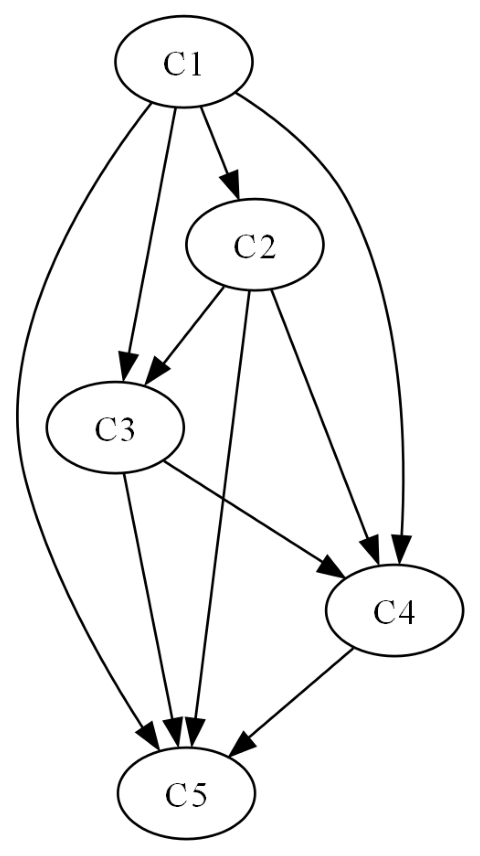

In [70]:
cluster_dag.draw_cluster_graph()

In [71]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)
est_graph = cluster_pc.run()

Topological ordering ['C1', 'C2', 'C3', 'C4', 'C5']
Cluster node indices of C1 are [0 7]
Local graph node indices of C1 are [0 7]


Into: ->C1, no parents, nothing to do  : 100%|██████████| 1/1 [00:00<00:00, 1001.03it/s, duration: 0.00sec]


Cluster node indices of C1 are [0 7]
Local graph node indices of C1 are [0 7]


In:     C1, Depth=0, working on node 7: 100%|██████████| 2/2 [00:00<00:00, 400.14it/s, duration: 0.01sec]


Neighbors of 0 in C1 are [7]
Testing edges from 0 to 7
0 ind 7 | () with p-value 0.750788
Neighbors of 7 in C1 are [0]
Testing edges from 7 to 0
7 ind 0 | () with p-value 0.750788
Deleted edge from 0 to 7
Cluster node indices of C2 are [ 2  6 12 18 19]
Local graph node indices of C2 are [ 0  2  6  7 12 18 19]


Into: ->C2, Depth=4, working on node 19: 100%|██████████| 5/5 [00:00<00:00, 555.96it/s, duration: 0.05sec]


Parents of 2 in pa(C2) are [0 7]
Testing edges from 2 to 0
2 ind 0 | () with p-value 0.264785
Testing edges from 2 to 7
2 ind 7 | () with p-value 0.319585
Parents of 6 in pa(C2) are [0 7]
Testing edges from 6 to 0
6 dep 0 | () with p-value 0.000000
Testing edges from 6 to 7
6 ind 7 | () with p-value 0.988812
Parents of 12 in pa(C2) are [0 7]
Testing edges from 12 to 0
12 ind 0 | () with p-value 0.289435
Testing edges from 12 to 7
12 ind 7 | () with p-value 0.089648
Parents of 18 in pa(C2) are [0 7]
Testing edges from 18 to 0
18 ind 0 | () with p-value 0.266068
Testing edges from 18 to 7
18 ind 7 | () with p-value 0.990800
Parents of 19 in pa(C2) are [0 7]
Testing edges from 19 to 0
19 ind 0 | () with p-value 0.666736
Testing edges from 19 to 7
19 ind 7 | () with p-value 0.633352
Deleted edge from 12 to 7
Deleted edge from 18 to 7
Deleted edge from 2 to 7
Deleted edge from 19 to 7
Deleted edge from 12 to 0
Deleted edge from 18 to 0
Deleted edge from 2 to 0
Deleted edge from 0 to 19
Dele

In:     C2, Depth=0, working on node 19: 100%|██████████| 5/5 [00:00<00:00, 416.92it/s, duration: 0.01sec]


Neighbors of 2 in C2 are [ 6 12 18 19]
Testing edges from 2 to 6
2 ind 6 | () with p-value 0.154294
Testing edges from 2 to 12
2 ind 12 | () with p-value 0.559435
Testing edges from 2 to 18
2 ind 18 | () with p-value 0.636505
Testing edges from 2 to 19
2 ind 19 | () with p-value 0.076900
Neighbors of 6 in C2 are [ 2 12 18 19]
Testing edges from 6 to 2
6 ind 2 | () with p-value 0.154294
Testing edges from 6 to 12
6 ind 12 | () with p-value 0.778842
Testing edges from 6 to 18
6 ind 18 | () with p-value 0.076462
Testing edges from 6 to 19
6 ind 19 | () with p-value 0.475566
Neighbors of 12 in C2 are [ 2  6 18 19]
Testing edges from 12 to 2
12 ind 2 | () with p-value 0.559435
Testing edges from 12 to 6
12 ind 6 | () with p-value 0.778842
Testing edges from 12 to 18
12 ind 18 | () with p-value 0.492868
Testing edges from 12 to 19
12 ind 19 | () with p-value 0.178138
Neighbors of 18 in C2 are [ 2  6 12 19]
Testing edges from 18 to 2
18 ind 2 | () with p-value 0.636505
Testing edges from 18 t

Into: ->C3, Depth=2, working on node 8:  43%|████▎     | 3/7 [00:00<00:00, 142.94it/s] 

Parents of 1 in pa(C3) are [ 0  2  6  7 12 18 19]
Testing edges from 1 to 0
1 ind 0 | () with p-value 0.075908
Testing edges from 1 to 2
1 ind 2 | () with p-value 0.342609
Testing edges from 1 to 6
1 dep 6 | () with p-value 0.011509
Testing edges from 1 to 7
1 dep 7 | () with p-value 0.000000
Testing edges from 1 to 12
1 ind 12 | () with p-value 0.626259
Testing edges from 1 to 18
1 ind 18 | () with p-value 0.644841
Testing edges from 1 to 19
1 ind 19 | () with p-value 0.051438
Parents of 3 in pa(C3) are [ 0  2  6  7 12 18 19]
Testing edges from 3 to 0
3 ind 0 | () with p-value 0.380773
Testing edges from 3 to 2
3 dep 2 | () with p-value 0.000000
Testing edges from 3 to 6
3 ind 6 | () with p-value 0.408041
Testing edges from 3 to 7
3 ind 7 | () with p-value 0.246413
Testing edges from 3 to 12
3 ind 12 | () with p-value 0.605557
Testing edges from 3 to 18
3 dep 18 | () with p-value 0.000000
Testing edges from 3 to 19
3 ind 19 | () with p-value 0.842776
Parents of 8 in pa(C3) are [ 0  2 

Into: ->C3, Depth=2, working on node 11:  86%|████████▌ | 6/7 [00:00<00:00, 142.94it/s]

Parents of 9 in pa(C3) are [19]
Testing edges from 9 to 19
9 dep 19 | (1, 3) with p-value 0.000000
9 dep 19 | (1, 8) with p-value 0.000000
9 dep 19 | (1, 10) with p-value 0.000000
9 dep 19 | (1, 11) with p-value 0.000000
9 dep 19 | (1, 13) with p-value 0.000000
9 dep 19 | (3, 8) with p-value 0.000000
9 dep 19 | (3, 10) with p-value 0.000000
9 dep 19 | (3, 11) with p-value 0.000000
9 dep 19 | (3, 13) with p-value 0.000000
9 dep 19 | (8, 10) with p-value 0.000000
9 dep 19 | (8, 11) with p-value 0.000000
9 dep 19 | (8, 13) with p-value 0.000000
9 dep 19 | (10, 11) with p-value 0.000000
9 dep 19 | (10, 13) with p-value 0.000000
9 dep 19 | (11, 13) with p-value 0.000000
Parents of 10 in pa(C3) are [0]
Testing edges from 10 to 0
10 dep 0 | (1, 3) with p-value 0.000000
10 dep 0 | (1, 8) with p-value 0.000000
10 dep 0 | (1, 9) with p-value 0.000000
10 dep 0 | (1, 11) with p-value 0.000000
10 dep 0 | (1, 13) with p-value 0.000000
10 dep 0 | (3, 8) with p-value 0.000000
10 dep 0 | (3, 9) with p-

Into: ->C3, Depth=3, working on node 3:  29%|██▊       | 2/7 [00:00<00:00, 250.14it/s] 

Parents of 11 in pa(C3) are [0]
Testing edges from 11 to 0
11 dep 0 | (1, 3) with p-value 0.000000
11 dep 0 | (1, 8) with p-value 0.000000
11 dep 0 | (1, 9) with p-value 0.000000
11 dep 0 | (1, 10) with p-value 0.000000
11 dep 0 | (1, 13) with p-value 0.000000
11 dep 0 | (3, 8) with p-value 0.000000
11 dep 0 | (3, 9) with p-value 0.000000
11 dep 0 | (3, 10) with p-value 0.000000
11 dep 0 | (3, 13) with p-value 0.000000
11 dep 0 | (8, 9) with p-value 0.000000
11 dep 0 | (8, 10) with p-value 0.000000
11 dep 0 | (8, 13) with p-value 0.000000
11 dep 0 | (9, 10) with p-value 0.000000
11 dep 0 | (9, 13) with p-value 0.000000
11 dep 0 | (10, 13) with p-value 0.000000
Parents of 13 in pa(C3) are [ 2 19]
Testing edges from 13 to 2
13 dep 2 | (1, 3) with p-value 0.000000
13 dep 2 | (1, 8) with p-value 0.000000
13 dep 2 | (1, 9) with p-value 0.000000
13 dep 2 | (1, 10) with p-value 0.000000
13 dep 2 | (1, 11) with p-value 0.000000
13 dep 2 | (1, 19) with p-value 0.000000
13 dep 2 | (3, 8) with p-

Into: ->C3, Depth=3, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 114.82it/s]

3 dep 18 | (2, 9, 11) with p-value 0.000000
3 dep 18 | (2, 9, 13) with p-value 0.000000
3 dep 18 | (2, 10, 11) with p-value 0.000000
3 dep 18 | (2, 10, 13) with p-value 0.000000
3 dep 18 | (2, 11, 13) with p-value 0.000000
3 dep 18 | (8, 9, 10) with p-value 0.000000
3 dep 18 | (8, 9, 11) with p-value 0.000000
3 dep 18 | (8, 9, 13) with p-value 0.000000
3 dep 18 | (8, 10, 11) with p-value 0.000000
3 dep 18 | (8, 10, 13) with p-value 0.000000
3 dep 18 | (8, 11, 13) with p-value 0.000000
3 dep 18 | (9, 10, 11) with p-value 0.000000
3 dep 18 | (9, 10, 13) with p-value 0.000000
3 dep 18 | (9, 11, 13) with p-value 0.000000
3 dep 18 | (10, 11, 13) with p-value 0.000000
Parents of 8 in pa(C3) are [6]
Testing edges from 8 to 6
8 dep 6 | (1, 3, 9) with p-value 0.000000
8 dep 6 | (1, 3, 10) with p-value 0.000000
8 dep 6 | (1, 3, 11) with p-value 0.000000
8 dep 6 | (1, 3, 13) with p-value 0.000000
8 dep 6 | (1, 9, 10) with p-value 0.000000
8 dep 6 | (1, 9, 11) with p-value 0.000000
8 dep 6 | (1, 9

Into: ->C3, Depth=4, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 129.71it/s]

Parents of 13 in pa(C3) are [ 2 19]
Testing edges from 13 to 2
13 dep 2 | (1, 3, 8) with p-value 0.000000
13 dep 2 | (1, 3, 9) with p-value 0.000000
13 dep 2 | (1, 3, 10) with p-value 0.000000
13 dep 2 | (1, 3, 11) with p-value 0.000000
13 dep 2 | (1, 3, 19) with p-value 0.000000
13 dep 2 | (1, 8, 9) with p-value 0.000000
13 dep 2 | (1, 8, 10) with p-value 0.000000
13 dep 2 | (1, 8, 11) with p-value 0.000000
13 dep 2 | (1, 8, 19) with p-value 0.000000
13 dep 2 | (1, 9, 10) with p-value 0.000000
13 dep 2 | (1, 9, 11) with p-value 0.000000
13 dep 2 | (1, 9, 19) with p-value 0.000000
13 dep 2 | (1, 10, 11) with p-value 0.000000
13 dep 2 | (1, 10, 19) with p-value 0.000000
13 dep 2 | (1, 11, 19) with p-value 0.000000
13 dep 2 | (3, 8, 9) with p-value 0.000000
13 dep 2 | (3, 8, 10) with p-value 0.000000
13 dep 2 | (3, 8, 11) with p-value 0.000000
13 dep 2 | (3, 8, 19) with p-value 0.000000
13 dep 2 | (3, 9, 10) with p-value 0.000000
13 dep 2 | (3, 9, 11) with p-value 0.000000
13 dep 2 | (3,

Into: ->C3, Depth=4, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 90.96it/s] 

13 dep 19 | (1, 3, 8, 11) with p-value 0.000000
13 dep 19 | (1, 3, 9, 10) with p-value 0.000000
13 dep 19 | (1, 3, 9, 11) with p-value 0.000000
13 dep 19 | (1, 3, 10, 11) with p-value 0.000000
13 dep 19 | (1, 8, 9, 10) with p-value 0.000000
13 dep 19 | (1, 8, 9, 11) with p-value 0.000000
13 dep 19 | (1, 8, 10, 11) with p-value 0.000000
13 dep 19 | (1, 9, 10, 11) with p-value 0.000000
13 dep 19 | (2, 3, 8, 9) with p-value 0.000000
13 dep 19 | (2, 3, 8, 10) with p-value 0.000000
13 dep 19 | (2, 3, 8, 11) with p-value 0.000000
13 dep 19 | (2, 3, 9, 10) with p-value 0.000000
13 dep 19 | (2, 3, 9, 11) with p-value 0.000000
13 dep 19 | (2, 3, 10, 11) with p-value 0.000000
13 dep 19 | (2, 8, 9, 10) with p-value 0.000000
13 dep 19 | (2, 8, 9, 11) with p-value 0.000000
13 dep 19 | (2, 8, 10, 11) with p-value 0.000000
13 dep 19 | (2, 9, 10, 11) with p-value 0.000000
13 dep 19 | (3, 8, 9, 10) with p-value 0.000000
13 dep 19 | (3, 8, 9, 11) with p-value 0.000000
13 dep 19 | (3, 8, 10, 11) with p-v

Into: ->C3, Depth=5, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 145.92it/s]

Parents of 1 in pa(C3) are [7]
Testing edges from 1 to 7
1 dep 7 | (3, 8, 9, 10, 11) with p-value 0.000018
1 dep 7 | (3, 8, 9, 10, 13) with p-value 0.000022
1 dep 7 | (3, 8, 9, 11, 13) with p-value 0.000000
1 dep 7 | (3, 8, 10, 11, 13) with p-value 0.000015
1 dep 7 | (3, 9, 10, 11, 13) with p-value 0.000017
1 dep 7 | (8, 9, 10, 11, 13) with p-value 0.000016
Parents of 3 in pa(C3) are [ 2 18]
Testing edges from 3 to 2
3 dep 2 | (1, 8, 9, 10, 11) with p-value 0.000000
3 dep 2 | (1, 8, 9, 10, 13) with p-value 0.000000
3 dep 2 | (1, 8, 9, 10, 18) with p-value 0.000000
3 dep 2 | (1, 8, 9, 11, 13) with p-value 0.000000
3 dep 2 | (1, 8, 9, 11, 18) with p-value 0.000000
3 dep 2 | (1, 8, 9, 13, 18) with p-value 0.000000
3 dep 2 | (1, 8, 10, 11, 13) with p-value 0.000000
3 dep 2 | (1, 8, 10, 11, 18) with p-value 0.000000
3 dep 2 | (1, 8, 10, 13, 18) with p-value 0.000000
3 dep 2 | (1, 8, 11, 13, 18) with p-value 0.000000
3 dep 2 | (1, 9, 10, 11, 13) with p-value 0.000000
3 dep 2 | (1, 9, 10, 11,

Into: ->C3, Depth=7, working on node 3:  29%|██▊       | 2/7 [00:00<00:00, 1000.67it/s]

Parents of 1 in pa(C3) are [7]
Testing edges from 1 to 7
1 dep 7 | (3, 8, 9, 10, 11, 13) with p-value 0.000018
Parents of 3 in pa(C3) are [ 2 18]
Testing edges from 3 to 2
3 dep 2 | (1, 8, 9, 10, 11, 13) with p-value 0.000000
3 dep 2 | (1, 8, 9, 10, 11, 18) with p-value 0.000000
3 dep 2 | (1, 8, 9, 10, 13, 18) with p-value 0.000000
3 dep 2 | (1, 8, 9, 11, 13, 18) with p-value 0.000000
3 dep 2 | (1, 8, 10, 11, 13, 18) with p-value 0.000000
3 dep 2 | (1, 9, 10, 11, 13, 18) with p-value 0.000000
3 dep 2 | (8, 9, 10, 11, 13, 18) with p-value 0.000000
Testing edges from 3 to 18
3 dep 18 | (1, 2, 8, 9, 10, 11) with p-value 0.000000
3 dep 18 | (1, 2, 8, 9, 10, 13) with p-value 0.000000
3 dep 18 | (1, 2, 8, 9, 11, 13) with p-value 0.000000
3 dep 18 | (1, 2, 8, 10, 11, 13) with p-value 0.000000
3 dep 18 | (1, 2, 9, 10, 11, 13) with p-value 0.000000
3 dep 18 | (1, 8, 9, 10, 11, 13) with p-value 0.000000
3 dep 18 | (2, 8, 9, 10, 11, 13) with p-value 0.000000
Parents of 8 in pa(C3) are [6]
Testing

Into: ->C3, Depth=7, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 500.28it/s, duration: 0.39sec]


Parents of 8 in pa(C3) are [6]
Testing edges from 8 to 6
Parents of 9 in pa(C3) are [19]
Testing edges from 9 to 19
Parents of 10 in pa(C3) are [0]
Testing edges from 10 to 0
Parents of 11 in pa(C3) are [0]
Testing edges from 11 to 0
Parents of 13 in pa(C3) are [ 2 19]
Testing edges from 13 to 2
13 dep 2 | (1, 3, 8, 9, 10, 11, 19) with p-value 0.000000
Testing edges from 13 to 19
13 dep 19 | (1, 2, 3, 8, 9, 10, 11) with p-value 0.000000
Cluster node indices of C3 are [ 1  3  8  9 10 11 13]
Local graph node indices of C3 are [ 1  3  8  9 10 11 13]


In:     C3, Depth=0, working on node 13: 100%|██████████| 7/7 [00:00<00:00, 583.71it/s, duration: 0.05sec]


Neighbors of 1 in C3 are [ 3  8  9 10 11 13]
Testing edges from 1 to 3
1 ind 3 | () with p-value 0.744267
Testing edges from 1 to 8
1 dep 8 | () with p-value 0.014552
Testing edges from 1 to 9
1 ind 9 | () with p-value 0.290734
Testing edges from 1 to 10
1 dep 10 | () with p-value 0.000000
Testing edges from 1 to 11
1 ind 11 | () with p-value 0.754184
Testing edges from 1 to 13
1 ind 13 | () with p-value 0.799964
Neighbors of 3 in C3 are [ 1  8  9 10 11 13]
Testing edges from 3 to 1
3 ind 1 | () with p-value 0.744267
Testing edges from 3 to 8
3 ind 8 | () with p-value 0.797693
Testing edges from 3 to 9
3 ind 9 | () with p-value 0.736926
Testing edges from 3 to 10
3 ind 10 | () with p-value 0.749746
Testing edges from 3 to 11
3 ind 11 | () with p-value 0.349073
Testing edges from 3 to 13
3 ind 13 | () with p-value 0.056077
Neighbors of 8 in C3 are [ 1  3  9 10 11 13]
Testing edges from 8 to 1
8 dep 1 | () with p-value 0.014552
Testing edges from 8 to 3
8 ind 3 | () with p-value 0.797693

Into: ->C4, Depth=1, working on node 4:  33%|███▎      | 1/3 [00:00<00:00, 1001.03it/s]

Parents of 4 in pa(C4) are [ 0  1  2  3  6  7  8  9 10 11 12 13 18 19]
Testing edges from 4 to 0
4 dep 0 | () with p-value 0.000000
Testing edges from 4 to 1
4 ind 1 | () with p-value 0.431124
Testing edges from 4 to 2
4 ind 2 | () with p-value 0.254892
Testing edges from 4 to 3
4 ind 3 | () with p-value 0.958425
Testing edges from 4 to 6
4 dep 6 | () with p-value 0.000000
Testing edges from 4 to 7
4 ind 7 | () with p-value 0.126362
Testing edges from 4 to 8
4 dep 8 | () with p-value 0.000000
Testing edges from 4 to 9
4 dep 9 | () with p-value 0.045056
Testing edges from 4 to 10
4 dep 10 | () with p-value 0.000000
Testing edges from 4 to 11
4 dep 11 | () with p-value 0.000000
Testing edges from 4 to 12
4 dep 12 | () with p-value 0.000000
Testing edges from 4 to 13
4 dep 13 | () with p-value 0.000864
Testing edges from 4 to 18
4 ind 18 | () with p-value 0.235641
Testing edges from 4 to 19
4 dep 19 | () with p-value 0.000000
Parents of 14 in pa(C4) are [ 0  1  2  3  6  7  8  9 10 11 12 1

Into: ->C4, Depth=2, working on node 14:  67%|██████▋   | 2/3 [00:00<00:00, 133.40it/s]

4 dep 11 | (9,) with p-value 0.000000
4 dep 11 | (10,) with p-value 0.000004
4 dep 11 | (12,) with p-value 0.000000
4 dep 11 | (13,) with p-value 0.000000
4 dep 11 | (14,) with p-value 0.000000
4 dep 11 | (17,) with p-value 0.000000
4 dep 11 | (19,) with p-value 0.000000
Testing edges from 4 to 12
4 dep 12 | (0,) with p-value 0.000000
4 dep 12 | (6,) with p-value 0.000000
4 dep 12 | (8,) with p-value 0.000000
4 dep 12 | (9,) with p-value 0.000000
4 dep 12 | (10,) with p-value 0.000000
4 dep 12 | (11,) with p-value 0.000000
4 dep 12 | (13,) with p-value 0.000000
4 dep 12 | (14,) with p-value 0.000000
4 dep 12 | (17,) with p-value 0.000000
4 dep 12 | (19,) with p-value 0.000000
Testing edges from 4 to 13
4 dep 13 | (0,) with p-value 0.000024
4 dep 13 | (6,) with p-value 0.000005
4 dep 13 | (8,) with p-value 0.000000
4 dep 13 | (9,) with p-value 0.005218
4 dep 13 | (10,) with p-value 0.000344
4 dep 13 | (11,) with p-value 0.000233
4 dep 13 | (12,) with p-value 0.000112
4 dep 13 | (14,) wi

Into: ->C4, Depth=3, working on node 17: 100%|██████████| 3/3 [00:00<00:00, 176.57it/s]

Parents of 14 in pa(C4) are [3 7]
Testing edges from 14 to 3
14 dep 3 | (4, 7) with p-value 0.000000
14 dep 3 | (4, 17) with p-value 0.000000
14 dep 3 | (7, 17) with p-value 0.000000
Testing edges from 14 to 7
14 dep 7 | (3, 4) with p-value 0.000000
14 dep 7 | (3, 17) with p-value 0.000000
14 dep 7 | (4, 17) with p-value 0.000000
Parents of 17 in pa(C4) are [13]
Testing edges from 17 to 13
17 dep 13 | (4, 14) with p-value 0.000000
Parents of 4 in pa(C4) are [ 0  8 12 19]
Testing edges from 4 to 0
4 dep 0 | (8, 12, 14) with p-value 0.013990
4 dep 0 | (8, 12, 17) with p-value 0.013504
4 dep 0 | (8, 12, 19) with p-value 0.012137
4 dep 0 | (8, 14, 17) with p-value 0.002155
4 dep 0 | (8, 14, 19) with p-value 0.001849
4 dep 0 | (8, 17, 19) with p-value 0.001689
4 dep 0 | (12, 14, 17) with p-value 0.000000
4 dep 0 | (12, 14, 19) with p-value 0.000000
4 dep 0 | (12, 17, 19) with p-value 0.000000
4 dep 0 | (14, 17, 19) with p-value 0.000000
Testing edges from 4 to 8
4 dep 8 | (0, 12, 14) with p

Into: ->C4, Depth=4, working on node 17: 100%|██████████| 3/3 [00:00<00:00, 272.84it/s]

Parents of 4 in pa(C4) are [ 0  8 12 19]
Testing edges from 4 to 0
4 dep 0 | (8, 12, 14, 17) with p-value 0.013386
4 dep 0 | (8, 12, 14, 19) with p-value 0.011411
4 dep 0 | (8, 12, 17, 19) with p-value 0.012123
4 dep 0 | (8, 14, 17, 19) with p-value 0.001869
4 dep 0 | (12, 14, 17, 19) with p-value 0.000000
Testing edges from 4 to 8
4 dep 8 | (0, 12, 14, 17) with p-value 0.000000
4 dep 8 | (0, 12, 14, 19) with p-value 0.000000
4 dep 8 | (0, 12, 17, 19) with p-value 0.000000
4 dep 8 | (0, 14, 17, 19) with p-value 0.000000
4 dep 8 | (12, 14, 17, 19) with p-value 0.000000
Testing edges from 4 to 12
4 dep 12 | (0, 8, 14, 17) with p-value 0.000000
4 dep 12 | (0, 8, 14, 19) with p-value 0.000000
4 dep 12 | (0, 8, 17, 19) with p-value 0.000000
4 dep 12 | (0, 14, 17, 19) with p-value 0.000000
4 dep 12 | (8, 14, 17, 19) with p-value 0.000000
Testing edges from 4 to 19
4 dep 19 | (0, 8, 12, 14) with p-value 0.000000
4 dep 19 | (0, 8, 12, 17) with p-value 0.000000
4 dep 19 | (0, 8, 14, 17) with p-

Into: ->C4, Depth=5, working on node 17: 100%|██████████| 3/3 [00:00<00:00, 375.23it/s, duration: 0.15sec]


Parents of 4 in pa(C4) are [ 0  8 12 19]
Testing edges from 4 to 0
4 dep 0 | (8, 12, 14, 17, 19) with p-value 0.011471
Testing edges from 4 to 8
4 dep 8 | (0, 12, 14, 17, 19) with p-value 0.000000
Testing edges from 4 to 12
4 dep 12 | (0, 8, 14, 17, 19) with p-value 0.000000
Testing edges from 4 to 19
4 dep 19 | (0, 8, 12, 14, 17) with p-value 0.000000
Parents of 14 in pa(C4) are [3 7]
Testing edges from 14 to 3
Testing edges from 14 to 7
Cluster node indices of C4 are [ 4 14 17]
Local graph node indices of C4 are [ 4 14 17]


In:     C4, Depth=0, working on node 17: 100%|██████████| 3/3 [00:00<00:00, 500.24it/s, duration: 0.03sec]


Neighbors of 4 in C4 are [14 17]
Testing edges from 4 to 14
4 ind 14 | () with p-value 0.596798
Testing edges from 4 to 17
4 dep 17 | () with p-value 0.006042
Neighbors of 14 in C4 are [ 4 17]
Testing edges from 14 to 4
14 ind 4 | () with p-value 0.596798
Testing edges from 14 to 17
14 ind 17 | () with p-value 0.351310
Neighbors of 17 in C4 are [ 4 14]
Testing edges from 17 to 4
17 dep 4 | () with p-value 0.006042
Testing edges from 17 to 14
17 ind 14 | () with p-value 0.351310
Deleted edge from 14 to 17
Deleted edge from 14 to 4
Neighbors of 4 in C4 are [17]
Testing edges from 4 to 17
4 dep 17 | (0,) with p-value 0.000877
4 dep 17 | (8,) with p-value 0.000073
4 dep 17 | (12,) with p-value 0.001777
4 ind 17 | (19,) with p-value 0.867374
Neighbors of 14 in C4 are []
Neighbors of 17 in C4 are [4]
Testing edges from 17 to 4
17 ind 4 | (13,) with p-value 0.515190
Deleted edge from 4 to 17
Neighbors of 4 in C4 are []
Neighbors of 14 in C4 are []
Neighbors of 17 in C4 are []
Neighbors of 4 i

Into: ->C5, Depth=1, working on node 5:  33%|███▎      | 1/3 [00:00<?, ?it/s]          

Parents of 5 in pa(C5) are [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 17 18 19]
Testing edges from 5 to 0
5 dep 0 | () with p-value 0.000002
Testing edges from 5 to 1
5 ind 1 | () with p-value 0.192625
Testing edges from 5 to 2
5 dep 2 | () with p-value 0.000000
Testing edges from 5 to 3
5 dep 3 | () with p-value 0.000000
Testing edges from 5 to 4
5 dep 4 | () with p-value 0.000207
Testing edges from 5 to 6
5 dep 6 | () with p-value 0.000152
Testing edges from 5 to 7
5 ind 7 | () with p-value 0.714460
Testing edges from 5 to 8
5 dep 8 | () with p-value 0.002409
Testing edges from 5 to 9
5 dep 9 | () with p-value 0.000000
Testing edges from 5 to 10
5 dep 10 | () with p-value 0.000124
Testing edges from 5 to 11
5 dep 11 | () with p-value 0.000000
Testing edges from 5 to 12
5 ind 12 | () with p-value 0.434202
Testing edges from 5 to 13
5 dep 13 | () with p-value 0.000000
Testing edges from 5 to 14
5 dep 14 | () with p-value 0.000000
Testing edges from 5 to 17
5 dep 17 | () with p-value 0.

Into: ->C5, Depth=1, working on node 15:  67%|██████▋   | 2/3 [00:00<00:00, 26.33it/s]

5 dep 17 | (4,) with p-value 0.000000
5 dep 17 | (6,) with p-value 0.000000
5 dep 17 | (8,) with p-value 0.000000
5 dep 17 | (9,) with p-value 0.000000
5 dep 17 | (10,) with p-value 0.000000
5 dep 17 | (11,) with p-value 0.000000
5 dep 17 | (13,) with p-value 0.000000
5 dep 17 | (14,) with p-value 0.000000
5 dep 17 | (15,) with p-value 0.000000
5 dep 17 | (16,) with p-value 0.000000
5 dep 17 | (18,) with p-value 0.000000
5 dep 17 | (19,) with p-value 0.000000
Testing edges from 5 to 18
5 dep 18 | (0,) with p-value 0.000000
5 dep 18 | (2,) with p-value 0.000000
5 ind 18 | (3,) with p-value 0.051607
5 dep 18 | (4,) with p-value 0.000000
5 dep 18 | (6,) with p-value 0.000000
5 dep 18 | (8,) with p-value 0.000000
5 dep 18 | (9,) with p-value 0.000000
5 dep 18 | (10,) with p-value 0.000000
5 dep 18 | (11,) with p-value 0.000000
5 dep 18 | (13,) with p-value 0.000000
5 dep 18 | (14,) with p-value 0.000003
5 dep 18 | (15,) with p-value 0.000000
5 dep 18 | (16,) with p-value 0.000000
5 dep 18 

Into: ->C5, Depth=1, working on node 16: 100%|██████████| 3/3 [00:00<00:00, 19.88it/s]


15 dep 14 | (13,) with p-value 0.000000
15 dep 14 | (16,) with p-value 0.000000
15 dep 14 | (17,) with p-value 0.000000
15 dep 14 | (18,) with p-value 0.000000
Testing edges from 15 to 17
15 dep 17 | (0,) with p-value 0.000000
15 dep 17 | (1,) with p-value 0.000000
15 dep 17 | (2,) with p-value 0.000000
15 dep 17 | (3,) with p-value 0.000000
15 dep 17 | (4,) with p-value 0.000000
15 dep 17 | (5,) with p-value 0.022022
15 dep 17 | (6,) with p-value 0.000000
15 dep 17 | (7,) with p-value 0.000000
15 dep 17 | (8,) with p-value 0.000000
15 dep 17 | (9,) with p-value 0.000000
15 dep 17 | (10,) with p-value 0.000000
15 dep 17 | (11,) with p-value 0.000000
15 dep 17 | (13,) with p-value 0.000000
15 dep 17 | (14,) with p-value 0.000000
15 dep 17 | (16,) with p-value 0.000000
15 dep 17 | (18,) with p-value 0.000000
Testing edges from 15 to 18
15 dep 18 | (0,) with p-value 0.000000
15 dep 18 | (1,) with p-value 0.000000
15 dep 18 | (2,) with p-value 0.000000
15 ind 18 | (3,) with p-value 0.5633

Into: ->C5, Depth=2, working on node 15:  67%|██████▋   | 2/3 [00:00<00:00, 222.31it/s]

16 dep 1 | (5,) with p-value 0.000000
16 dep 1 | (6,) with p-value 0.000000
16 dep 1 | (7,) with p-value 0.000000
16 dep 1 | (8,) with p-value 0.000000
16 ind 1 | (10,) with p-value 0.762262
16 dep 1 | (11,) with p-value 0.000000
16 dep 1 | (15,) with p-value 0.000000
Testing edges from 16 to 4
16 ind 4 | (0,) with p-value 0.199298
16 dep 4 | (1,) with p-value 0.000000
16 dep 4 | (5,) with p-value 0.000000
16 ind 4 | (6,) with p-value 0.659692
16 dep 4 | (7,) with p-value 0.000000
16 ind 4 | (8,) with p-value 0.980626
16 ind 4 | (10,) with p-value 0.058654
16 dep 4 | (11,) with p-value 0.000000
16 dep 4 | (15,) with p-value 0.000000
Testing edges from 16 to 6
16 ind 6 | (0,) with p-value 0.886793
16 dep 6 | (1,) with p-value 0.000000
16 dep 6 | (4,) with p-value 0.000000
16 dep 6 | (5,) with p-value 0.000000
16 dep 6 | (7,) with p-value 0.000000
16 dep 6 | (8,) with p-value 0.000000
16 ind 6 | (10,) with p-value 0.368931
16 dep 6 | (11,) with p-value 0.000000
16 dep 6 | (15,) with p-va

Into: ->C5, Depth=4, working on node 16: 100%|██████████| 3/3 [00:00<00:00, 272.85it/s, duration: 0.36sec]


15 dep 8 | (1, 2) with p-value 0.000000
15 dep 8 | (1, 3) with p-value 0.000000
15 dep 8 | (1, 5) with p-value 0.000000
15 dep 8 | (1, 7) with p-value 0.000000
15 dep 8 | (1, 14) with p-value 0.000000
15 ind 8 | (1, 16) with p-value 0.923577
15 dep 8 | (1, 17) with p-value 0.000000
15 dep 8 | (2, 3) with p-value 0.000000
15 dep 8 | (2, 5) with p-value 0.000000
15 dep 8 | (2, 7) with p-value 0.000000
15 dep 8 | (2, 14) with p-value 0.000000
15 dep 8 | (2, 16) with p-value 0.001007
15 dep 8 | (2, 17) with p-value 0.000000
15 dep 8 | (3, 5) with p-value 0.000000
15 dep 8 | (3, 7) with p-value 0.000000
15 dep 8 | (3, 14) with p-value 0.000000
15 dep 8 | (3, 16) with p-value 0.000000
15 dep 8 | (3, 17) with p-value 0.000000
15 dep 8 | (5, 7) with p-value 0.000000
15 dep 8 | (5, 14) with p-value 0.000000
15 dep 8 | (5, 16) with p-value 0.000000
15 dep 8 | (5, 17) with p-value 0.000000
15 dep 8 | (7, 14) with p-value 0.000000
15 dep 8 | (7, 16) with p-value 0.000158
15 dep 8 | (7, 17) with p-

In:     C5, Depth=0, working on node 15:  67%|██████▋   | 2/3 [00:00<00:00, 400.14it/s] 

Neighbors of 5 in C5 are [15 16]
Testing edges from 5 to 15
5 dep 15 | () with p-value 0.000000
Testing edges from 5 to 16
5 dep 16 | () with p-value 0.000095
Neighbors of 15 in C5 are [ 5 16]
Testing edges from 15 to 5
15 dep 5 | () with p-value 0.000000
Testing edges from 15 to 16
15 dep 16 | () with p-value 0.000000
Neighbors of 16 in C5 are [ 5 15]
Testing edges from 16 to 5
16 dep 5 | () with p-value 0.000095
Testing edges from 16 to 15
16 dep 15 | () with p-value 0.000000
Neighbors of 5 in C5 are [15 16]
Testing edges from 5 to 15
5 dep 15 | (11,) with p-value 0.000000
5 dep 15 | (16,) with p-value 0.000000
5 dep 15 | (17,) with p-value 0.000000
Testing edges from 5 to 16
5 ind 16 | (11,) with p-value 0.238373
5 dep 16 | (15,) with p-value 0.000000
5 dep 16 | (17,) with p-value 0.000000


In:     C5, Depth=0, working on node 16: 100%|██████████| 3/3 [00:00<00:00, 272.70it/s, duration: 0.05sec]

Neighbors of 15 in C5 are [ 5 16]
Testing edges from 15 to 5
15 dep 5 | (1,) with p-value 0.000000
15 dep 5 | (14,) with p-value 0.000000
15 dep 5 | (16,) with p-value 0.000000
15 dep 5 | (17,) with p-value 0.000000
Testing edges from 15 to 16
15 dep 16 | (1,) with p-value 0.000000
15 dep 16 | (5,) with p-value 0.000000
15 dep 16 | (14,) with p-value 0.000000
15 dep 16 | (17,) with p-value 0.000000
Neighbors of 16 in C5 are [ 5 15]
Testing edges from 16 to 5
16 ind 5 | (10,) with p-value 0.422941
16 dep 5 | (15,) with p-value 0.000000
Testing edges from 16 to 15
16 dep 15 | (5,) with p-value 0.000000
16 dep 15 | (10,) with p-value 0.000000
Deleted edge from 5 to 16
Neighbors of 5 in C5 are [15]
Testing edges from 5 to 15
5 dep 15 | (11, 17) with p-value 0.000000
Neighbors of 15 in C5 are [ 5 16]
Testing edges from 15 to 5
15 dep 5 | (1, 14) with p-value 0.000000
15 dep 5 | (1, 16) with p-value 0.000000
15 dep 5 | (1, 17) with p-value 0.000000
15 dep 5 | (14, 16) with p-value 0.000000
1

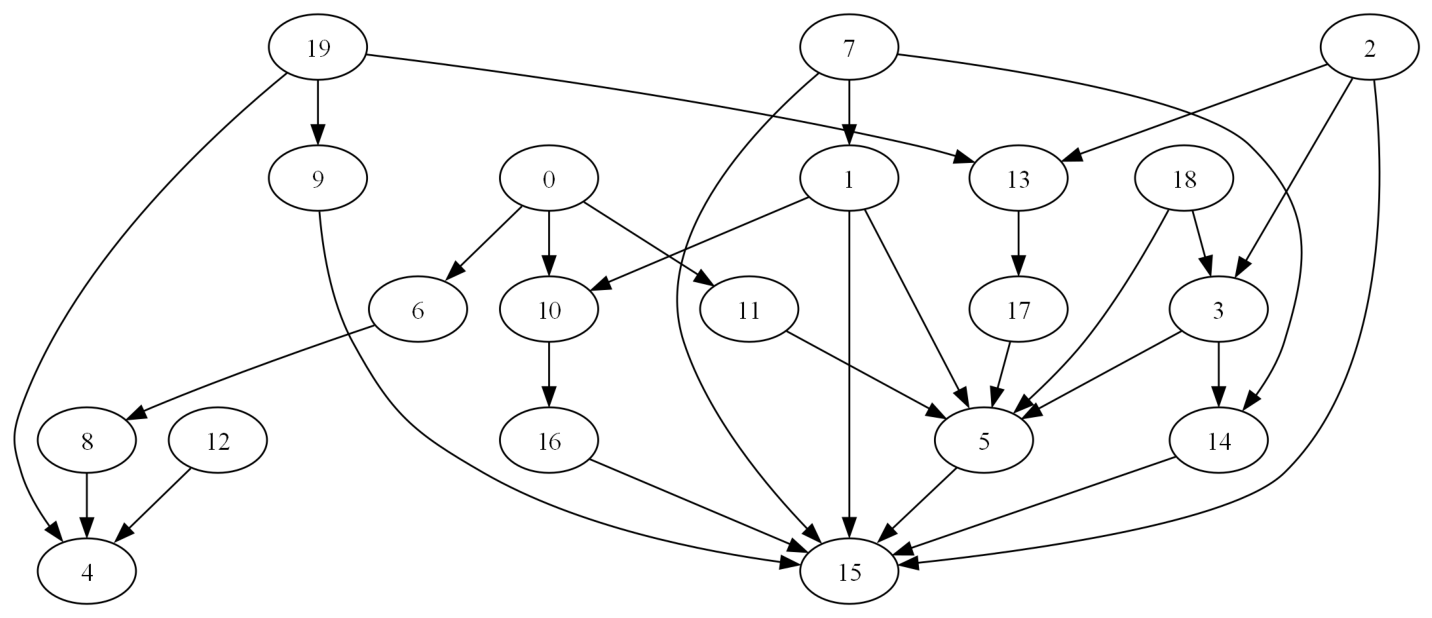

In [72]:
cluster_dag.true_dag.draw_pydot_graph()

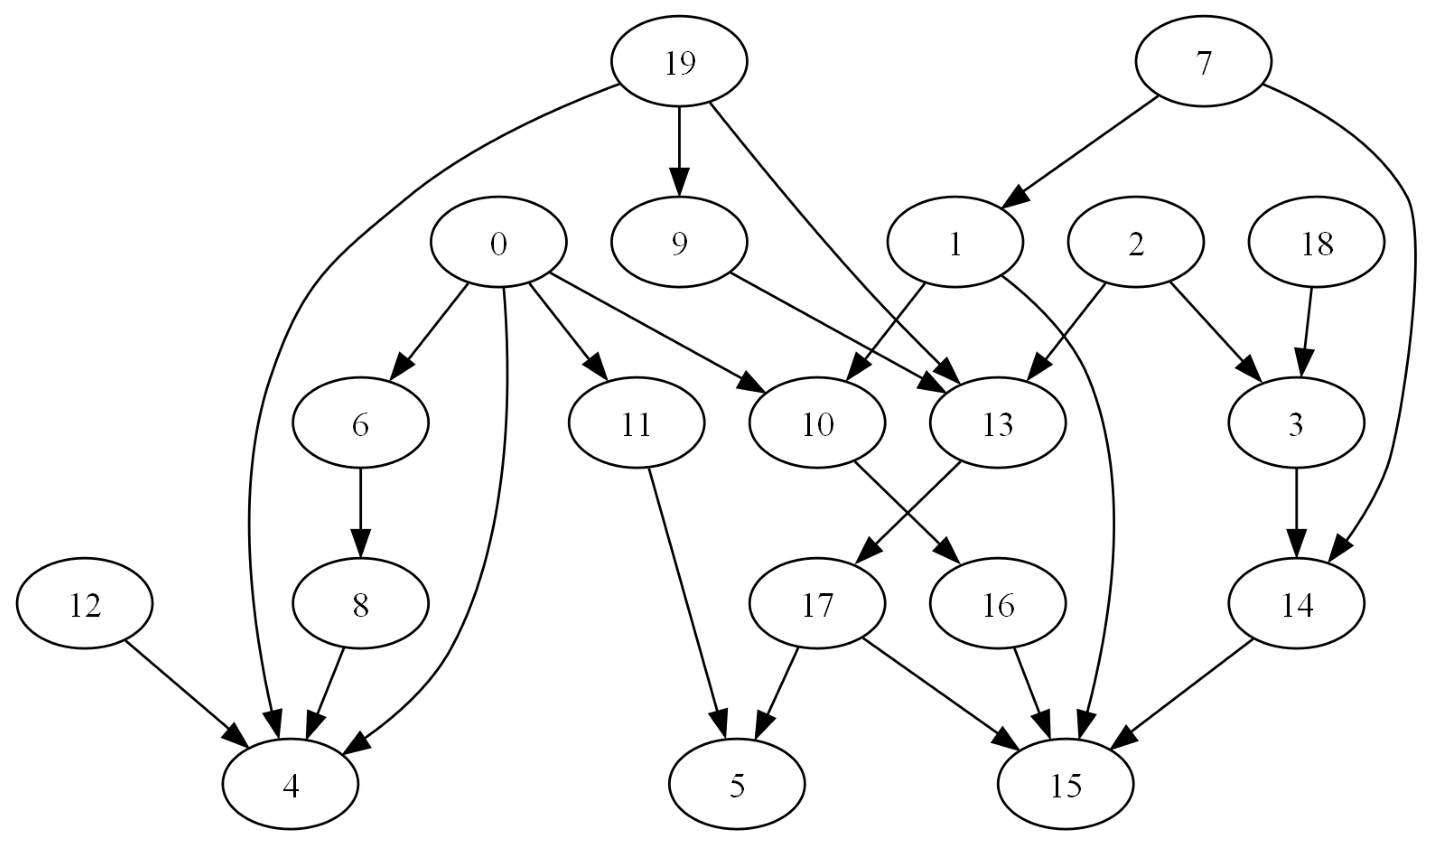

In [73]:
est_graph.draw_pydot_graph()

In [74]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd, sid = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)
print("SID: ", sid)

Adjacency confusion:  {'true_positive': 23, 'false_positive': 3, 'false_negative': 7, 'true_negative': 157, 'precision': 0.8846153846153846, 'recall': 0.7666666666666667, 'f1_score': 0.8214285714285715}
Arrow confusion:  {'true_positive': 23.0, 'false_positive': 3.0, 'false_negative': 7.0, 'true_negative': 367.0, 'precision': 0.8846153846153846, 'recall': 0.7666666666666667, 'f1_score': 0.8214285714285715, 'true_positive_ce': 23.0, 'false_positive_ce': 0.0, 'false_negative_ce': 0.0, 'true_negative_ce': 377.0, 'precision_ce': 1.0, 'recall_ce': 1.0, 'f1_score_ce': 1.0}
SHD:  10
SID:  {'sid_lower': 27, 'sid_upper': 61}


In [75]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
# node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, alpha = 0.05, verbose=False, node_names=node_names)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd, cl_sid = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)
print("SID", cl_sid)

Depth=3, working on node 19: 100%|██████████| 20/20 [00:00<00:00, 870.03it/s]


Adjacency confusion:  {'true_positive': 24, 'false_positive': 2, 'false_negative': 6, 'true_negative': 158, 'precision': 0.9230769230769231, 'recall': 0.8, 'f1_score': 0.8571428571428571}
Arrow confusion:  {'true_positive': 14.0, 'false_positive': 6.0, 'false_negative': 16.0, 'true_negative': 364.0, 'precision': 0.7, 'recall': 0.4666666666666667, 'f1_score': 0.56, 'true_positive_ce': 14.0, 'false_positive_ce': 5.0, 'false_negative_ce': 10.0, 'true_negative_ce': 371.0, 'precision_ce': 0.7368421052631579, 'recall_ce': 0.5833333333333334, 'f1_score_ce': 0.6511627906976745}
SHD:  13
SID {'sid_lower': 79, 'sid_upper': 124}


In [76]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
False


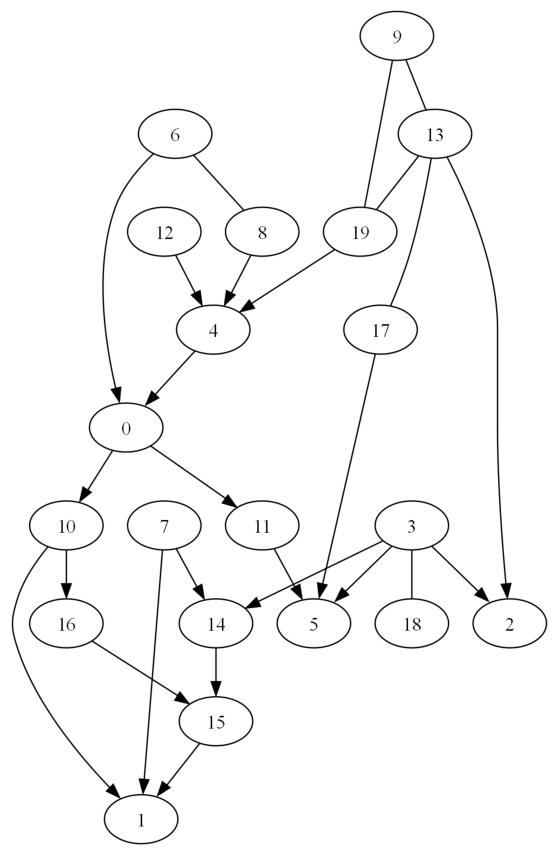

In [77]:
causallearn_cg.draw_pydot_graph()

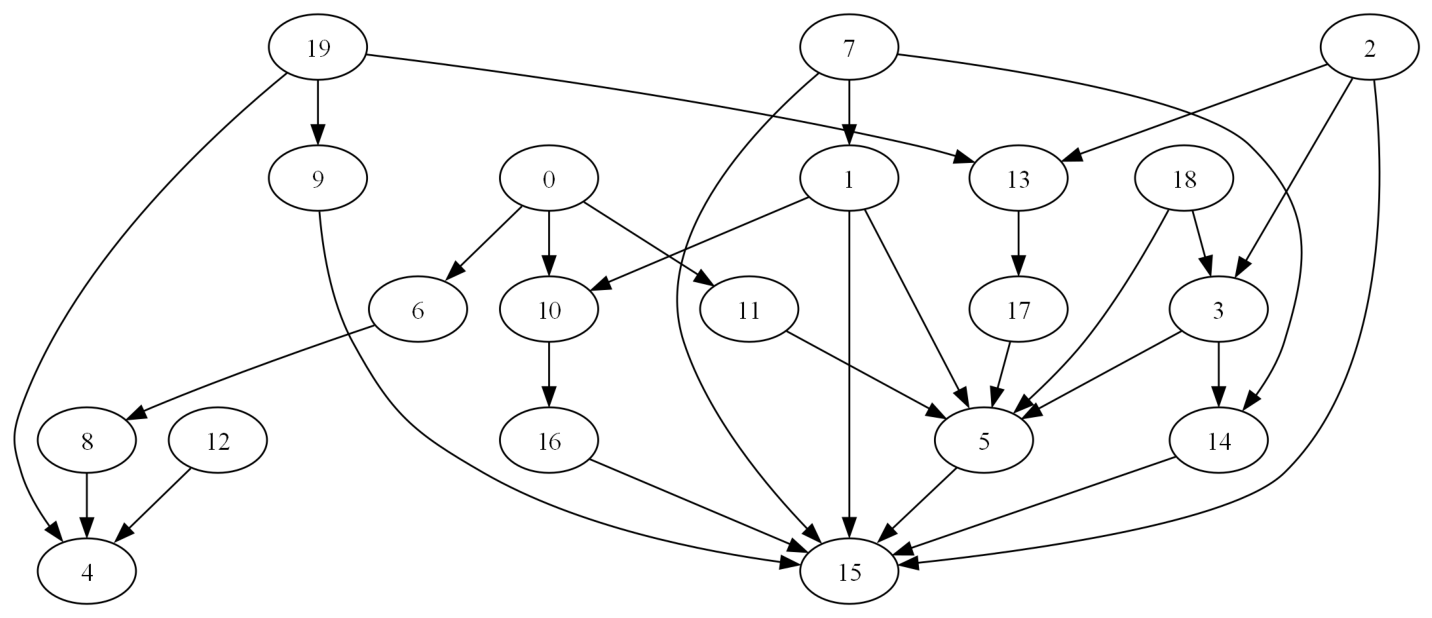

In [78]:
cluster_dag.true_dag.draw_pydot_graph()

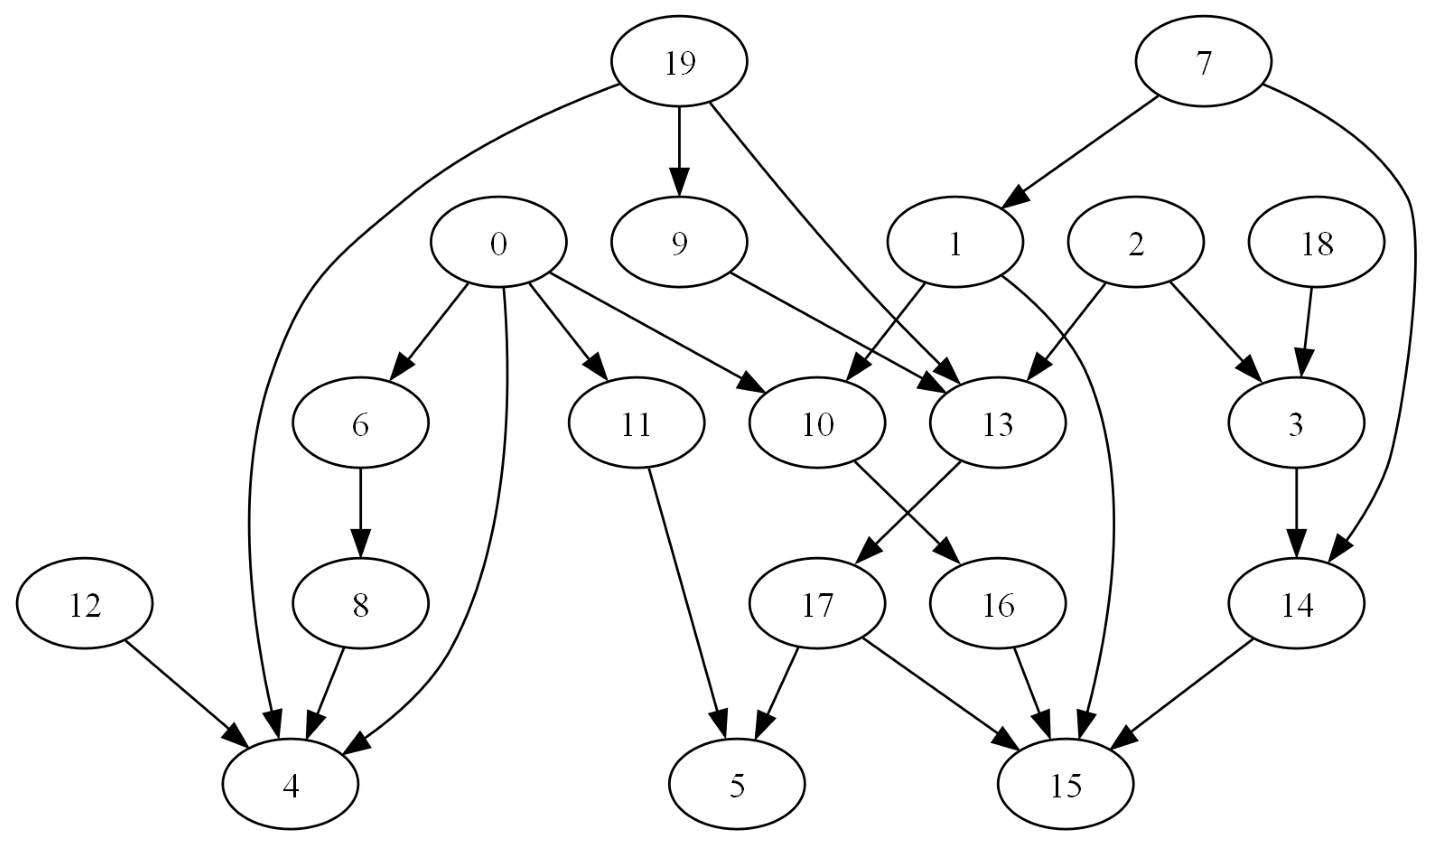

In [79]:
est_graph.draw_pydot_graph()